# Pedestrian Crash - Trying to predict XYZ at the time of impact
## Read the dataset

Edo tha prospathiso na kano regress to X ti stigmi tou Crash.

## Importing the libraries

In [1]:
# edo eimai, predict XYZ coords in collision. write them in the thesis. Watch out the last layer. It is linear.
# 2) Predict exact collision time.
# 3) Predict relative move rnn
# 4) use kans
# i am trying to perform normalization here. not working....

from pathlib import Path
import sys
sys.path.insert(0, "C:\\Users\geork\projects\AIThesis\src\src")
import matplotlib.pyplot as plt

from dataset_reader import DatasetReaderCSV

## Read the dataset

In [2]:
path = Path("C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_3\\dataset.csv")
reader = DatasetReaderCSV(path)
reader.read()
df = reader.convert_to_dataframe()
df = df.drop(columns=["Id", "Position", "Path", "GifPath", "Head_Collision_XYZ_index", "CarProfile"], errors="ignore")

In [3]:
print(df.dtypes)

Velocity               int64
Translation            int64
Rotation               int64
Head_Collision_X     float64
Head_Collision_Y     float64
Head_Collision_Z     float64
Bumber_Height          int64
Front_Hood_Height      int64
Bumber_Hood_Angle      int64
Hood_Length            int64
Back_Hood_Height       int64
dtype: object


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming df is your DataFrame
# Define features (X) and targets (y)
X = df.drop(columns=['Head_Collision_X', 'Head_Collision_Y', 'Head_Collision_Z'])
y = df[['Head_Collision_X', "Head_Collision_Y", "Head_Collision_Z"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Normalize the target (y) values
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(3)  # 3 output neurons for Head_Collision_X, Head_Collision_Y, Head_Collision_Z
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
filepath = Path("C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_3\\5_3_2\\model_5_3_2.keras")
model_checkpoint = ModelCheckpoint(filepath, save_best_only=True, monitor='val_loss', mode='min')

# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=32, 
                    callbacks=[
                        #early_stopping, 
                        reduce_lr,
                        model_checkpoint
                        ])

c:\Users\geork\projects\AIThesis\src\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.3633 - val_loss: 0.0807 - learning_rate: 0.0010
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6532 - val_loss: 0.0438 - learning_rate: 0.0010
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1519 - val_loss: 0.0375 - learning_rate: 0.0010
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8424 - val_loss: 0.0339 - learning_rate: 0.0010
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7285 - val_loss: 0.0344 - learning_rate: 0.0010
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6382 - val_loss: 0.0309 - learning_rate: 0.0010
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5044 - val_loss: 0.0272 - learning_rate: 0.0010
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4594 - val_loss: 0.0273 - learning_rate: 0.0010
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3608 - val_loss: 0.0252 - learning_rate: 0.0010
Epoch 10/200
24/24

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0070 
Test Loss: 0.007397560402750969
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
   Predicted X  Predicted Y  Predicted Z
0   291.354797    39.651138  1108.907104
1   459.854645  -114.913765  1209.999146
2   472.558929   415.494507  1206.745605
3   263.869812    55.760254  1008.556458
4   335.915070   175.331573  1161.126587


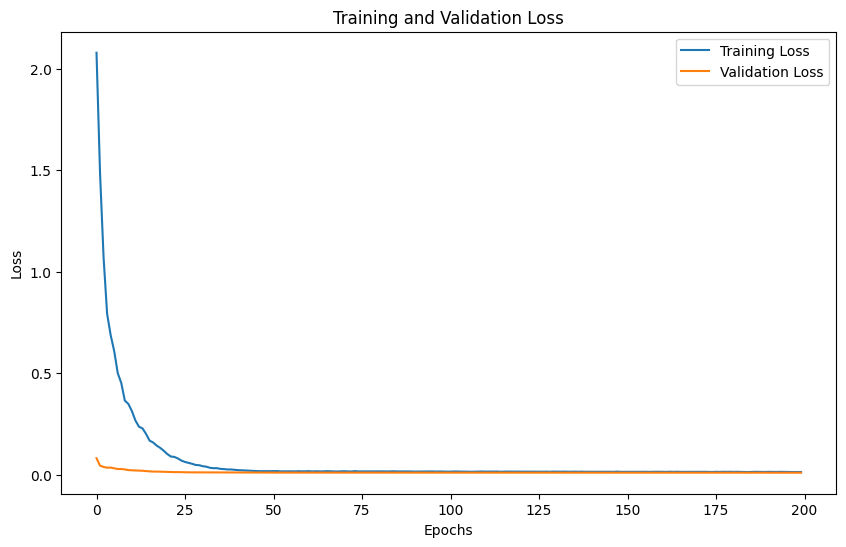

In [6]:
import os
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
y_pred_scaled = model.predict(X_test)

# Inverse transform the predictions and test data to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test)

# Save the scalers
import pickle
fpath = "C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_3\\5_3_2\\"
with open(os.path.join(fpath,'scaler_X.pkl'), 'wb') as f:
    pickle.dump(scaler_X, f)

with open(os.path.join(fpath, 'scaler_y.pkl'), 'wb') as f:
    pickle.dump(scaler_y, f)

# If you want to see the predictions
predictions_df = pd.DataFrame(y_pred, columns=['Predicted X', "Predicted Y", "Predicted Z"])
print(predictions_df.head())

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

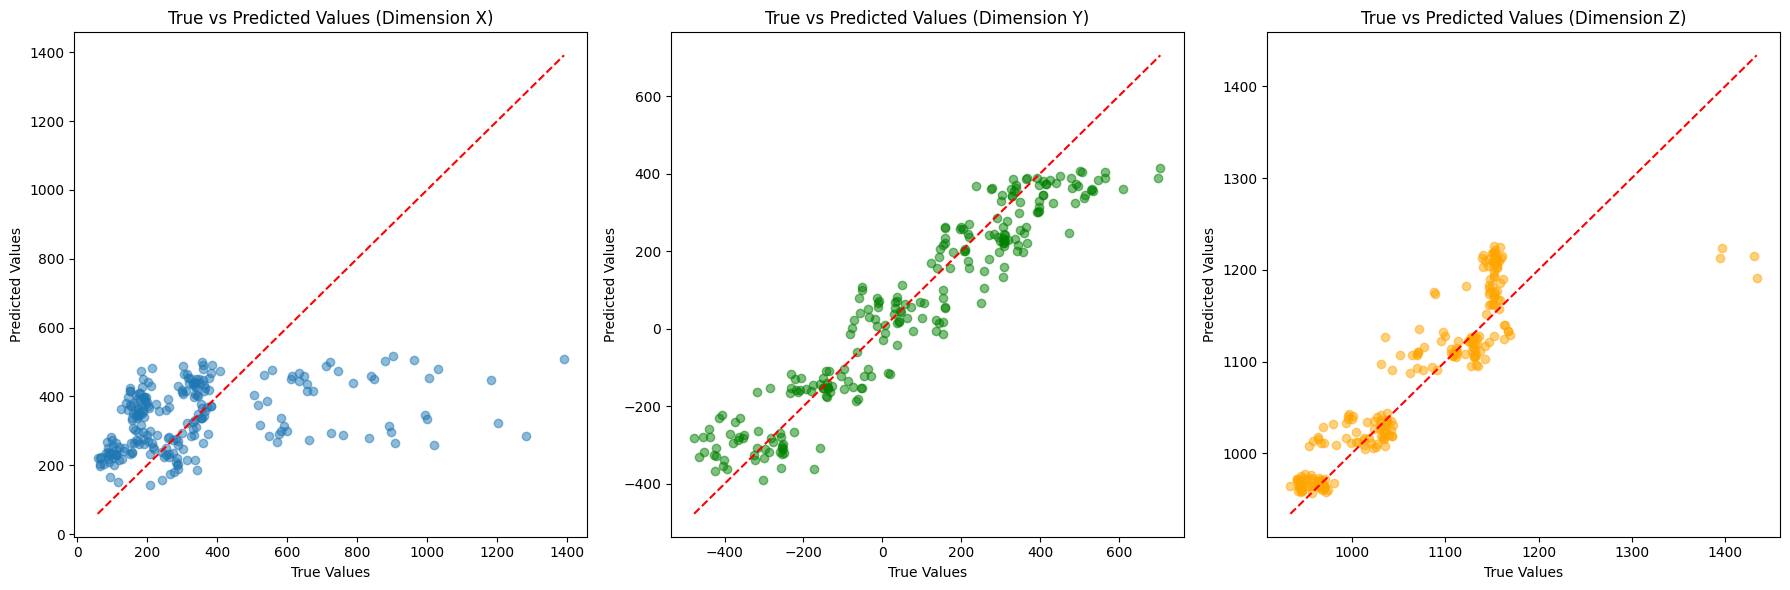

In [7]:
# Plotting true vs predicted values
comparison_df = pd.DataFrame({
    'True_Head_Collision_X': y_test_original[:, 0],
    'Predicted_Head_Collision_X': y_pred[:, 0],
    'True_Head_Collision_Y': y_test_original[:, 1],
    'Predicted_Head_Collision_Y': y_pred[:, 1],
    'True_Head_Collision_Z': y_test_original[:, 2],
    'Predicted_Head_Collision_Z': y_pred[:, 2]
})

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(comparison_df['True_Head_Collision_X'], comparison_df['Predicted_Head_Collision_X'], alpha=0.5)
axes[0].set_xlabel('True Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('True vs Predicted Values (Dimension X)')
axes[0].plot([comparison_df['True_Head_Collision_X'].min(), comparison_df['True_Head_Collision_X'].max()], 
             [comparison_df['True_Head_Collision_X'].min(), comparison_df['True_Head_Collision_X'].max()], 
             color='red', linestyle='--')

axes[1].scatter(comparison_df['True_Head_Collision_Y'], comparison_df['Predicted_Head_Collision_Y'], alpha=0.5, color='green')
axes[1].set_xlabel('True Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title('True vs Predicted Values (Dimension Y)')
axes[1].plot([comparison_df['True_Head_Collision_Y'].min(), comparison_df['True_Head_Collision_Y'].max()], 
             [comparison_df['True_Head_Collision_Y'].min(), comparison_df['True_Head_Collision_Y'].max()], 
             color='red', linestyle='--')

axes[2].scatter(comparison_df['True_Head_Collision_Z'], comparison_df['Predicted_Head_Collision_Z'], alpha=0.5, color='orange')
axes[2].set_xlabel('True Values')
axes[2].set_ylabel('Predicted Values')
axes[2].set_title('True vs Predicted Values (Dimension Z)')
axes[2].plot([comparison_df['True_Head_Collision_Z'].min(), comparison_df['True_Head_Collision_Z'].max()], 
             [comparison_df['True_Head_Collision_Z'].min(), comparison_df['True_Head_Collision_Z'].max()], 
             color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [8]:
# import pandas as pd

# # Make predictions
# y_pred = model.predict(X_test)
# # Assuming y_test is the true values and y_pred are the predictions

# y_test = y_test.reset_index(drop=True).rename(columns={'Head_Collision_X': 'True_Head_Collision_X', 
#                                                        "Head_Collision_Y" : "True_Head_Collision_Y",
#                                                        "Head_Collision_Z" : "True_Head_Collision_Z"})
# y_test_df = y_test
# y_pred_df = pd.DataFrame(y_pred, columns=['Predicted_Head_Collision_X',
#                                           "Predicted_Head_Collision_Y",
#                                           "Predicted_Head_Collision_Z"])

# # Merge true and predicted values into a single DataFrame
# comparison_df = pd.concat([y_test_df, y_pred_df], axis=1)

# # Plot true vs predicted values for each dimension separately
# fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# # Plot for the first dimension
# axes[0].scatter(comparison_df['True_Head_Collision_X'], comparison_df['Predicted_Head_Collision_X'], alpha=0.5)
# axes[0].set_xlabel('True Values')
# axes[0].set_ylabel('Predicted Values')
# axes[0].set_title('True vs Predicted Values (Dimension X)')
# axes[0].plot([comparison_df['True_Head_Collision_X'].min(), comparison_df['True_Head_Collision_X'].max()], 
#              [comparison_df['True_Head_Collision_X'].min(), comparison_df['True_Head_Collision_X'].max()], 
#              color='red', linestyle='--')  # Line of perfect prediction

# # Plot for the second dimension
# axes[1].scatter(comparison_df['True_Head_Collision_Y'], comparison_df['Predicted_Head_Collision_Y'], alpha=0.5, color='green')
# axes[1].set_xlabel('True Values')
# axes[1].set_ylabel('Predicted Values')
# axes[1].set_title('True vs Predicted Values (Dimension Y)')
# axes[1].plot([comparison_df['True_Head_Collision_Y'].min(), comparison_df['True_Head_Collision_Y'].max()], 
#              [comparison_df['True_Head_Collision_Y'].min(), comparison_df['True_Head_Collision_Y'].max()], 
#              color='red', linestyle='--')  # Line of perfect prediction

# # Plot for the third dimension
# axes[2].scatter(comparison_df['True_Head_Collision_Z'], comparison_df['Predicted_Head_Collision_Z'], alpha=0.5, color='orange')
# axes[2].set_xlabel('True Values')
# axes[2].set_ylabel('Predicted Values')
# axes[2].set_title('True vs Predicted Values (Dimension Z)')
# axes[2].plot([comparison_df['True_Head_Collision_Z'].min(), comparison_df['True_Head_Collision_Z'].max()], 
#              [comparison_df['True_Head_Collision_Z'].min(), comparison_df['True_Head_Collision_Z'].max()], 
#              color='red', linestyle='--')  # Line of perfect prediction

# plt.tight_layout()
# plt.show()
